In [1]:
import setcwd

setcwd.main()

Working directory:  /home/nmiolane/code/my28brains/my28brains
Directory added to path:  /home/nmiolane/code/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/my28brains


ERROR: Could not find a version that satisfies the requirement plotly-orca==1.3.1 (from versions: none)
ERROR: No matching distribution found for plotly-orca==1.3.1


In [3]:
import csv
import os
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
from joblib import Parallel, delayed

In [4]:
WORK_DIR = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(WORK_DIR, "data", "hormones.csv")
df = pd.read_csv(DATA_PATH, delimiter=",")
print(f"df has length: {len(df)} days")
df.head()

df has length: 60 days


,dayID,Estro,Prog,Test,DHEAS,LH,FSH,SHBG,EthinylEstradiol,Levonorgestresl,CycleDay
0,1,52.4,11.9,98.7,192.88,8.61,5.06,55.72,NaN,NaN,21
1,2,74.2,10.6,81.2,247.12,4.89,4.13,58.22,NaN,NaN,22
2,3,91.7,12.4,96.3,226.23,5.98,3.49,56.92,NaN,NaN,23
3,4,94.6,13.5,90.5,212.84,4.32,3.65,57.29,NaN,NaN,24
4,5,110.0,15.0,77.6,217.60,3.44,3.30,58.87,NaN,NaN,25


# Animations


In [11]:
HORMONES = {"Estro": "Estrogen", "Prog": "Progesterone", "LH": "LH", "FSH": "FSH"}
COLORS = {"Estro": "#1f77b4", "Prog": "#ff7f0e", "LH": "#2ca02c", "FSH": "#d62728"}

FIGS = os.path.join(os.getcwd(), "notebooks", "figs")

In [12]:
def plot_hormones(df, dayID, plot_type="dot", hormones=HORMONES, savefig=False):

    if plot_type == "dot":
        df = df[df["dayID"] < dayID]
    times = df["dayID"]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for h in hormones:
        ax.plot(times, df[h], label=HORMONES[h])

    if dayID > 2:
        if plot_type == "dot":
            for h in hormones:
                ax.scatter(times.values[-1], df[h].values[-1], s=100)

    ax.set_xlim((0, 30))
    ax.set_ylim(0, df["Estro"].max() + 5)
    ax.legend(loc="upper left")
    if savefig:
        fig.savefig(f"{FIGS}/plot_hormones_dot_pic{dayID:02d}.svg")
    return fig

In [13]:
# import plotly.graph_objects as go

# def plotly_hormones(df, dayID, plot_type="dot", hormones=HORMONES, savefig=False):
#     if plot_type == "dot":
#         df = df[df["dayID"] < dayID]
#     times = df["dayID"]

#     # Define custom colors for each hormone
#     colors = {
#         "Hormone1": "blue",
#         "Hormone2": "red",
#         "Hormone3": "green"
#     }

#     fig = go.Figure()

#     # Add traces
#     for h in hormones:
#         fig.add_trace(go.Scatter(x=times, y=df[h], mode='lines+markers' if plot_type == "dot" else 'lines', name=HORMONES[h], marker=dict(color=colors[h])))

#     # Add the last point with a larger marker size if dayID > 2 and plot_type is "dot"
#     if dayID > 2 and plot_type == "dot":
#         for h in hormones:
#             fig.add_trace(go.Scatter(x=[times.values[-1]], y=[df[h].values[-1]], mode='markers', marker=dict(size=10, color=colors[h]), showlegend=False))

#     # Set the axis labels and title
#     fig.update_layout(
#         xaxis_title="Day",
#         yaxis_title="Hormone Level",
#         title="Hormone Levels Over Time",
#         xaxis=dict(range=[0, 30]),
#         yaxis=dict(range=[0, df["Estro"].max()+5])
#     )

#     # Save the figure
#     if savefig:
#         fig.write_image(f"{FIGS}/plot_hormones_dot_pic{dayID:02d}.svg")

#     # Show the figure
#     fig.show()

In [123]:
import kaleido
import plotly.graph_objects as go


def plotly_hormones(df, dayID, plot_type="dot", hormones=HORMONES, ymax=None,savefig=False):
    if ymax is None:
        ymax = df[hormones].max().max() + 10
    if plot_type == "dot":
        df = df[df["dayID"] < dayID]
    times = df["dayID"]

    fig = go.Figure()

    # Add traces
    for h in hormones:
        fig.add_trace(
            go.Scatter(
                x=times,
                y=df[h],
                mode="lines+markers" if plot_type == "dot" else "lines",
                name=HORMONES[h],
                marker=dict(color=COLORS[h]),
            )
        )

    # Add the last point with a larger marker size if dayID > 2 and plot_type is "dot"
    if dayID > 1:
        if plot_type == "dot":
            for h in hormones:
                fig.add_trace(
                    go.Scatter(
                        x=[times.values[-1]],
                        y=[df[h].values[-1]],
                        mode="markers",
                        marker=dict(size=10, color=COLORS[h]),
                        showlegend=False,
                    )
                )
    if plot_type == "vertical_line":
        for h in hormones:
            fig.add_trace(
                go.Scatter(
                    x=[times.values[dayID], times.values[dayID]],
                    y=[0, ymax],
                    mode="lines",
                    line=dict(color="black"),
                    showlegend=False,
                )
            )

    # Set the axis labels and title
    fig.update_layout(
        xaxis_title="Day",
        yaxis_title="Hormone Level",
        #title={"text": "Hormone Levels Over Time", "x": 0.5, "y": 0.75, "xanchor": "center"},
        xaxis=dict(range=[0, 30]),
        yaxis=dict(range=[0, ymax]),
        width=900,  # Adjust the width as needed
        height=300  # Adjust the height as needed
    )

    # Save the figure
    if savefig:
        pio.write_image(fig, f"{FIGS}/plotly_hormones_{dayID:02d}.png", format="png")

    # Show the figure
    fig.show()

We select the first 30 days to get the first (natural) cycle.

In [124]:
natural_cycle_df = df[df["dayID"] < 31]
n_days = len(natural_cycle_df)
print(f"natural_cycle_df has length: {len(natural_cycle_df)} days.")

natural_cycle_df has length: 30 days.


## Make the animation

Make one plot to check the design.

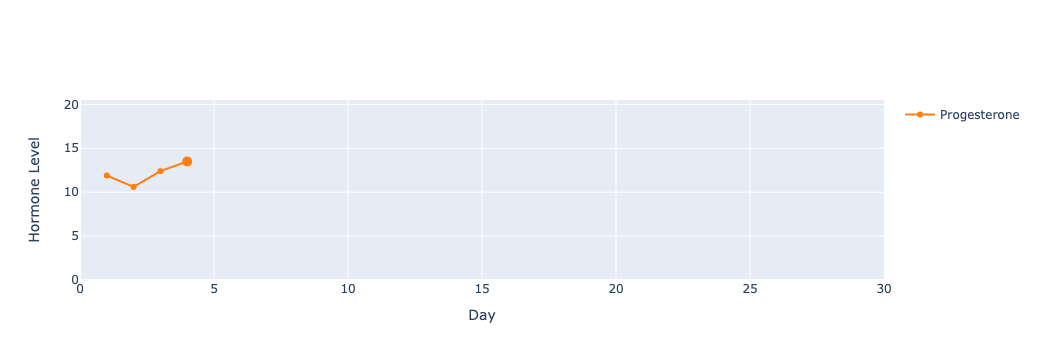

In [130]:
_ = plotly_hormones(
    natural_cycle_df,
    dayID=5,
    plot_type="dot",
    hormones=["Prog"],
    ymax= natural_cycle_df["Prog"].max()+5,
    savefig=True,
)

Make all plots to create the many .pngs.

In [131]:
def plot_all(i):
    plotly_hormones(
    natural_cycle_df,
    dayID=i,
    plot_type="dot",
    hormones=["Prog"],
    ymax= natural_cycle_df["Prog"].max()+5,
    savefig=True,
)

Parallel(n_jobs=-1)(delayed(plot_all)(i) for i in range(1,n_days))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Use ffmpeg to make the animation

In [132]:
FIGS

'/home/nmiolane/code/my28brains/my28brains/notebooks/figs'

In [134]:
!ffmpeg -framerate 10 -pattern_type glob -i '/home/nmiolane/code/my28brains/my28brains/notebooks/figs/plotly_hormones_*.png' -vf palettegen palette.png

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [135]:
!ffmpeg -framerate 10 -pattern_type glob -i '/home/nmiolane/code/my28brains/my28brains/notebooks/figs/plotly_hormones_*.png' -i palette.png -filter_complex "paletteuse" output.gif

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [87]:
!ls

all_hormones_line_frame_rate_10.gif  main.py		   __pycache__
discrete_surfaces.py		     my28brains_config.py  viz.py
io_mesh.py			     notebooks


In [48]:
os.system(
    f"ffmpeg -i {WORK_DIR}/data/hormones/dot_pic%02d_frame%01d.svg -vf palettegen palette.svg"
)
os.system(
    f"ffmpeg -framerate 24 -i {WORK_DIR}/data/hormones/dot_pic%02d_frame%01d.svg -i palette.svg -lavfi paletteuse -framerate 24 {WORK_DIR}/data/hormones/dot_video.gif"
)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

256

In [36]:







import glob
import os

ffmpeg -framerate 10 -pattern_type glob -i 'plot_hormones_dot_pic*.png' -vf palettegen
palette.png && ffmpeg -framerate 10 -pattern_type glob -i 'dot_pic*_frame*.png' -i palette.png -filter_complex "paletteuse" output.gif

# palette_path = os.path.join(WORK_DIR, "data/hormones/palette.png")
# img_paths = sorted(glob.glob(os.path.join(WORK_DIR, "data/hormones/dot_pic*_frame*.png")))

# # Generate palette file
# palette_cmd = f"ffmpeg -i {' '.join(img_paths)} -vf palettegen {palette_path}"
# if os.system(palette_cmd) != 0:
#     print("Error generating palette file")
#     exit()

# # Generate GIF using palette file
# gif_cmd = f"ffmpeg -framerate 24 -i {' '.join(img_paths)} -i {palette_path} -lavfi paletteuse -framerate 24 {os.path.join(WORK_DIR, 'data/hormones/dot_video.gif')}"
# if os.system(gif_cmd) != 0:
#     print("Error generating GIF file")
#     exit()
# else:
    
#     print("GIF file generated successfully")

# img_paths = sorted(glob.glob(os.path.join(WORK_DIR, "data/hormones/dot_pic*_frame*.png")))
# palette_path = os.path.join(WORK_DIR, "data/hormones/palette.png")

# os.system(f"ffmpeg -i {' '.join(img_paths)} -vf palettegen {WORK_DIR}/data/hormones/palette.png")
# os.system(f"ffmpeg -framerate 24 -i {' '.join(img_paths)} -i {WORK_DIR}/data/hormones/palette.png -lavfi paletteuse -framerate 24 {os.path.join(WORK_DIR, 'data/hormones/dot_video.gif')}")


# os.system(f"ffmpeg -i {' '.join(img_paths)} -vf palettegen {' '.join(palette_path)}")
# os.system(f"ffmpeg -framerate 24 -i {' '.join(img_paths)} -i {' '.join(palette_path)} -lavfi paletteuse -framerate 24 {os.path.join(WORK_DIR, 'data/hormones/dot_video.gif')}")

SyntaxError: invalid syntax (667853806.py, line 4)

In [ ]:
import glob
import os
import subprocess

palette_path = os.path.join(WORK_DIR, "data/hormones/palette.png")
img_paths = sorted(
    glob.glob(os.path.join(WORK_DIR, "data/hormones/dot_pic*_frame*.png"))
)

# Generate palette file
palette_cmd = ["ffmpeg", "-i", " ".join(img_paths), "-vf", "palettegen", palette_path]
palette_result = subprocess.run(
    palette_cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE
)
if palette_result.returncode != 0:
    print("Error generating palette file:")
    print(palette_result.stderr.decode())
    exit()

# Generate GIF using palette file
gif_cmd = [
    "ffmpeg",
    "-framerate",
    "24",
    "-i",
    " ".join(img_paths),
    "-i",
    palette_path,
    "-lavfi",
    "paletteuse",
    "-framerate",
    "24",
    os.path.join(WORK_DIR, "data/hormones/dot_video.gif"),
]
gif_result = subprocess.run(gif_cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
if gif_result.returncode != 0:
    print("Error generating GIF file:")
    print(gif_result.stderr.decode())
    exit()

else:
    print("GIF file generated successfully")

In [ ]:
os.getcwd()

In [ ]:
ffmpeg - -version